# Midterm-1 Review Questions  - *Solutions*
### ECE 204 Data Science & Engineering

In [19]:
import pandas as pd
df = pd.read_csv("cars.csv")

In [20]:
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


---
**Question 1** Find the name of the car with the highest horsepower.

In [21]:
# Solution 1 -- Problem with this approach is that it assumes there is only 1 row with the highest horsepower.
# idxmax() returns the row label of the maximum value. If multiple values equal the maximum, the first row label with that value is returned.
ix = df.Horsepower.idxmax() # Step 1
car_name = df.Name.loc[ix] # Step 2
print(car_name)

pontiac grand prix


In [22]:
# Solution 2 -- More robust
# find all rows that have the maximum horsepower
df[df.Horsepower == df.Horsepower.max()]  # when filtering, you can use df[...] or df.loc[...] (they do the same thing)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
123,9.5,8,400.0,230.0,16.0,pontiac grand prix,USA,4278,1973-01-01


---
**Question 2** How many cars in the dataset have a weight larger than or equal to 3000.0 lbs?

In [23]:
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [24]:
# Solution 1
print(  sum( df.Weight_in_lbs >= 3000.0 )  )

# Solution 2
result = df.Weight_in_lbs >= 3000.0
print( result.sum() )

# Solution 3
print(  len( df[ df.Weight_in_lbs >= 3000.0 ] ) )

# Solution 4
print(df[ df.Weight_in_lbs >= 3000.0 ].shape[0]) # Remember that .shape() returns a tuple

174
174
174
174


---
**Question 3** Find the displacement of the car(s) that has the shortest `Name` (in terms of number of characters) in the dataset.
<br>
*If there are more than one car that share the same "shortest" name, find the displacement of all such cars.*

In [25]:
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [26]:
# Create a column that contains the length of the name
df['name_len'] = df.Name.apply(len)
print("Length of the shortest name:", df.name_len.min())

df[df.name_len == df.name_len.min()]  # if s is a Pandas Series, min(s) and s.min() do the same thing

Length of the shortest name: 6


,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,name_len
157,15.5,4,108.0,93.0,26.0,subaru,Japan,2391,1974-01-01,6
353,17.8,4,97.0,67.0,32.3,subaru,Japan,2065,1982-01-01,6


---
**Question 4** Find the name of the car(s) that contain the most occurences of the letter `a` in the dataset.
<br>
*If there are more than one such car, display them all.*

In [27]:
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [28]:
# Solution

# Create a function that counts the number of a's
def acount(word):
    return word.count('a')

# add a new column with the number of a's
df['a_count'] = df.Name.apply(acount)

# display the results
df.Name[df.a_count == df.a_count.max()]

46     pontiac catalina brougham
103      amc ambassador brougham
Name: Name, dtype: object

---
**Question 5** For all cars having `Horsepower` greater than or equal to 100.0,find the following:
- Average `Acceleration`
- Median `Displacement`
- Standard Deviation of `Weight_in_lbs`
- Plot the histogram of `Acceleration` for all such cars

In [29]:
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


13.789655172413793
304.0
640.6511103502518


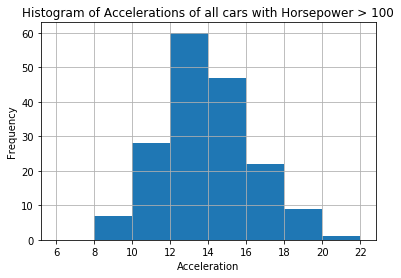

In [30]:
# Solution
df_filter = df[df.Horsepower >= 100.0]

print(df_filter.Acceleration.mean())
print(df_filter.Displacement.median())
print(df_filter.Weight_in_lbs.std())

ax = df_filter.Acceleration.plot.hist(bins=[6, 8, 10, 12, 14, 16, 18, 20, 22], grid=True, 
                                      title='Histogram of Accelerations of all cars with Horsepower > 100');
ax.set_xlabel('Acceleration');

---
**Question 6** In the cars dataset, find the general relationship between `Displacement` and `Horsepower` of the cars. <br>
Which plot type (line/bar/scatter/histogram) is the most suitable to visualize this relationship, and why?

In [31]:
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


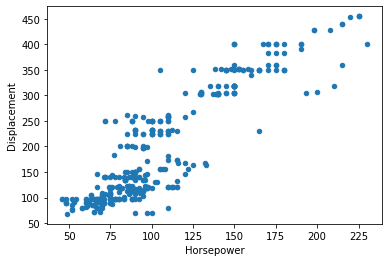

In [32]:
# Solution - Scatter plots are most intuitive
ax = df.plot.scatter(x='Horsepower', y='Displacement');
ax.set_xlabel("Horsepower")
ax.set_ylabel("Displacement");

# As the Horsepower increases, Displacement also tends to increase

---
**Question 7** Using the cars dataset, find the average `Miles per Gallon` for each possible `Origin`. You may want to use the `.unique()` method to find out how many unique origins there are.

Create a new DataFrame with the values you found above and generate a suitable (line/bar/scatter/histogram) visualization.

In [33]:
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


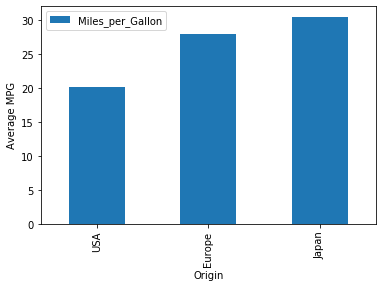

In [34]:
# Solution

MPG_USA = df[df.Origin == 'USA'].Miles_per_Gallon.mean()
MPG_Europe = df[df.Origin == 'Europe'].Miles_per_Gallon.mean()
MPG_Japan = df[df.Origin == 'Japan'].Miles_per_Gallon.mean()

df_mpg = pd.DataFrame({'Miles_per_Gallon': [MPG_USA, MPG_Europe, MPG_Japan], 'Origin': ['USA', 'Europe', 'Japan']})
ax = df_mpg.plot.bar(x = 'Origin', y = 'Miles_per_Gallon')
ax.set_ylabel("Average MPG");